In [167]:
import pandas as pd

In [168]:
df = pd.read_csv('adults_numeric.del', header = None)

In [169]:
df.columns =['age', 'education', 'work', 'marital', 'occupation', 'race', 'sex', 'native','Nan'] 

In [170]:
df = df[df.columns[:-1]]
df

,age,education,work,marital,occupation,race,sex,native
0,39,4,13,6,10,0,0,0
1,50,1,13,0,0,0,0,0
2,38,5,9,3,6,0,0,0
3,53,5,7,0,6,1,0,0
4,28,5,13,0,1,1,1,2
...,...,...,...,...,...,...,...,...
30157,27,5,12,0,2,0,1,0
30158,40,5,9,0,11,0,0,0
30159,58,5,9,2,10,0,1,0
30160,22,5,9,6,10,0,0,0


In [184]:
categorical = set((
    'work',
    'marital',
    'occupation',
    'race',
    'sex',
    'native'
))

In [185]:
for name in categorical:
    df[name] = df[name].astype('category')

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         30162 non-null  int64   
 1   education   30162 non-null  int64   
 2   work        30162 non-null  category
 3   marital     30162 non-null  category
 4   occupation  30162 non-null  category
 5   race        30162 non-null  category
 6   sex         30162 non-null  category
 7   native      30162 non-null  category
dtypes: category(6), int64(2)
memory usage: 651.8 KB


In [187]:
df.describe()

,age,education
count,30162.000000,30162.000000
mean,38.437902,4.217757
std,13.134665,1.484039
min,17.000000,0.000000
25%,28.000000,4.000000
50%,37.000000,5.000000
75%,47.000000,5.000000
max,90.000000,6.000000


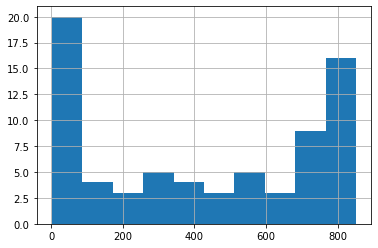

In [188]:
df['age'].value_counts().hist();

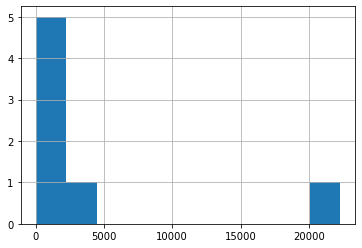

In [189]:
df['education'].value_counts().hist();

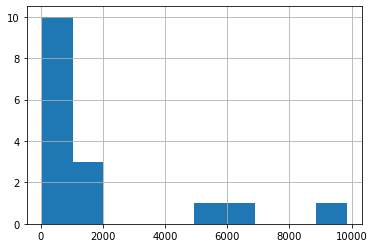

In [190]:
df['work'].value_counts().hist();

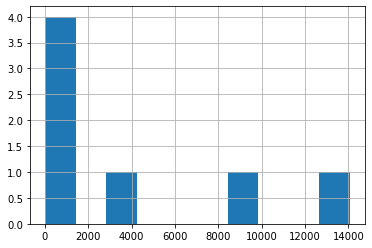

In [191]:
df['marital'].value_counts().hist();

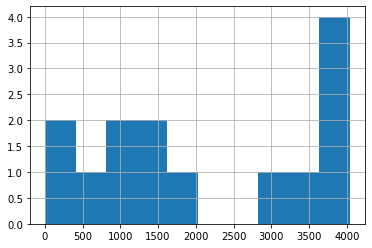

In [192]:
df['occupation'].value_counts().hist();

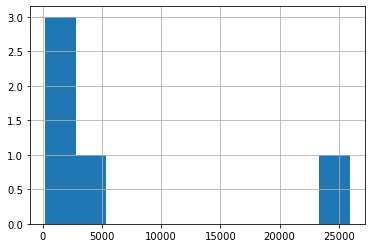

In [193]:
df['race'].value_counts().hist();

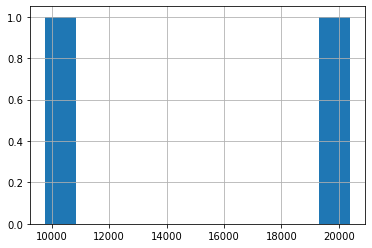

In [194]:
df['sex'].value_counts().hist();

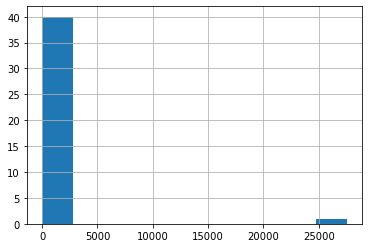

In [195]:
df['native'].value_counts().hist();

In [196]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            span = len(df[column][partition].unique())
        else:
            span = df[column][partition].max()-df[column][partition].min()
        if scale is not None:
            span = span/scale[column]
        spans[column] = span
    return spans


In [ ]:
full_spans = get_spans(df, df.index)
full_spans

In [ ]:
def split(df, partition, column):
    """
    :param        df: The dataframe to split
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    dfp = df[column][partition]
    if column in categorical:
        values = dfp.unique()
        lv = set(values[:len(values)//2])
        rv = set(values[len(values)//2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]
    else:        
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return (dfl, dfr)


In [175]:
def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if (rows.shape[0] < k):
            return False
        
    return True

In [203]:
isKAnonymized(df, 1)

True

In [215]:
isKAnonymized(df.head(2), 2)

False

In [216]:
df.head(2)

,age,education,work,marital,occupation,race,sex,native
0,39,4,13,6,10,0,0,0
1,50,1,13,0,0,0,0,0


## Data 2

In [145]:
df1 = pd.read_csv('dataset_500.txt', delim_whitespace=True, header = None)

In [146]:
df1.columns =['ID','age', 'education', 'work', 'marital', 'occupation', 'race', 'sex', 'native-country'] 

In [147]:
df1

,ID,age,education,work,marital,occupation,race,sex,native-country
0,e10001,59,9,Private,Married-civ-spouse,Machine-op-inspct,White,Female,Italy
1,e10002,22,10,Private,Never-married,Craft-repair,White,Male,United-States
2,e10003,41,12,Local-gov,Separated,Craft-repair,White,Male,United-States
3,e10004,25,13,Private,Never-married,Other-service,Black,Female,Jamaica
4,e10005,29,13,Federal-gov,Married-AF-spouse,Prof-specialty,White,Male,United-States
...,...,...,...,...,...,...,...,...,...
495,e10496,54,13,Self-emp-not-inc,Married-civ-spouse,Craft-repair,White,Male,United-States
496,e10497,50,9,Private,Married-civ-spouse,Handlers-cleaners,White,Male,United-States
497,e10498,42,11,Private,Married-civ-spouse,Other-service,White,Male,United-States
498,e10499,48,13,Federal-gov,Married-civ-spouse,Adm-clerical,White,Female,United-States


In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              500 non-null    object
 1   age             500 non-null    int64 
 2   education       500 non-null    int64 
 3   work            500 non-null    object
 4   marital         500 non-null    object
 5   occupation      500 non-null    object
 6   race            500 non-null    object
 7   sex             500 non-null    object
 8   native-country  500 non-null    object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


In [149]:
df1.describe()

,age,education
count,500.000000,500.000000
mean,38.228000,10.166000
std,12.744759,2.564292
min,17.000000,2.000000
25%,28.750000,9.000000
50%,37.000000,10.000000
75%,46.000000,13.000000
max,84.000000,16.000000


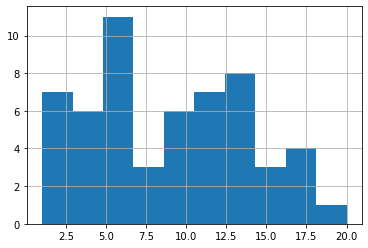

In [150]:
df1['age'].value_counts().hist();

In [151]:
categorical = set((
    'work-class',
    'marital-status',
    'occupation',
    'race',
    'sex',
    'native-country'
))

In [152]:
for name in categorical:
    df1[name] = df1[name].astype('category')

KeyError: 'marital-status'

In [153]:
df1

,ID,age,education,work,marital,occupation,race,sex,native-country
0,e10001,59,9,Private,Married-civ-spouse,Machine-op-inspct,White,Female,Italy
1,e10002,22,10,Private,Never-married,Craft-repair,White,Male,United-States
2,e10003,41,12,Local-gov,Separated,Craft-repair,White,Male,United-States
3,e10004,25,13,Private,Never-married,Other-service,Black,Female,Jamaica
4,e10005,29,13,Federal-gov,Married-AF-spouse,Prof-specialty,White,Male,United-States
...,...,...,...,...,...,...,...,...,...
495,e10496,54,13,Self-emp-not-inc,Married-civ-spouse,Craft-repair,White,Male,United-States
496,e10497,50,9,Private,Married-civ-spouse,Handlers-cleaners,White,Male,United-States
497,e10498,42,11,Private,Married-civ-spouse,Other-service,White,Male,United-States
498,e10499,48,13,Federal-gov,Married-civ-spouse,Adm-clerical,White,Female,United-States


ID is an Identifier

In [154]:
del df1['ID']

In [155]:
df1

,age,education,work,marital,occupation,race,sex,native-country
0,59,9,Private,Married-civ-spouse,Machine-op-inspct,White,Female,Italy
1,22,10,Private,Never-married,Craft-repair,White,Male,United-States
2,41,12,Local-gov,Separated,Craft-repair,White,Male,United-States
3,25,13,Private,Never-married,Other-service,Black,Female,Jamaica
4,29,13,Federal-gov,Married-AF-spouse,Prof-specialty,White,Male,United-States
...,...,...,...,...,...,...,...,...
495,54,13,Self-emp-not-inc,Married-civ-spouse,Craft-repair,White,Male,United-States
496,50,9,Private,Married-civ-spouse,Handlers-cleaners,White,Male,United-States
497,42,11,Private,Married-civ-spouse,Other-service,White,Male,United-States
498,48,13,Federal-gov,Married-civ-spouse,Adm-clerical,White,Female,United-States


In [156]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            span = len(df[column][partition].unique())
        else:
            span = df[column][partition].max()-df[column][partition].min()
        if scale is not None:
            span = span/scale[column]
        spans[column] = span
    return spans

In [157]:
full_spans = get_spans(df1, df1.index)
full_spans

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [138]:
def isKAnonymized(df, k):
    for index, row in df.iterrows():
        query = ' & '.join([f'{col} == {row[col]}' for col in df.columns])
        rows = df.query(query)
        if (rows.shape[0] < k):
            return False
        
    return True

In [139]:
isKAnonymized(df.head(100), 1)

SyntaxError: Python keyword not valid identifier in numexpr query (<unknown>, line 1)